In [1]:
pip install altair

In [2]:
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns

In [3]:
#importing dataset  
df = sns.load_dataset('mpg')
df.shape

(398, 9)

In [4]:
#checking dataset
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
df.keys()

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


In [7]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

In [8]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

#Scatterplots in Altair and Seaborn

In [25]:
alt.Chart(df).mark_point().encode(alt.Y('mpg'),alt.X('horsepower'),alt.Color('origin'),alt.OpacityValue(0.7),size='displacement')

alt.Chart(...)

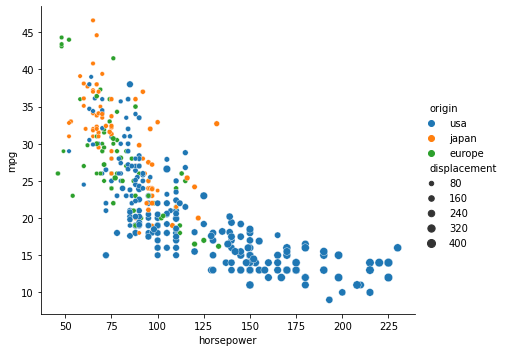

In [10]:
sns.relplot(y='mpg',x='horsepower',data=df,kind='scatter',size='displacement',hue='origin',aspect=1.2);

#Line Charts in Altair and Seaborn

In [11]:
alt.Chart(df).mark_line().encode(
    alt.X('horsepower'),
    alt.Y('acceleration'),
    alt.Color('origin')
    )

alt.Chart(...)

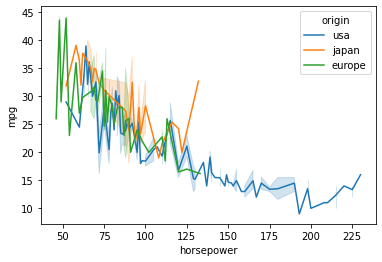

In [12]:
sns.lineplot(data=df, x='horsepower', y='mpg',hue='origin')

#Bar and Count plots

In [13]:
plot=alt.Chart(df).mark_bar(size=40).encode(
    alt.X('cylinders'),
    alt.Y('mpg'),
    alt.Color('origin')

)
plot.properties(title='cylinders vs mpg')

alt.Chart(...)

In [14]:
alt.Chart(df).mark_bar().encode(
    x='origin',
    y='count()',
    column='cylinders:Q',
    color=alt.Color('origin')
).properties(
    width=100,
    height=100    
)

alt.Chart(...)

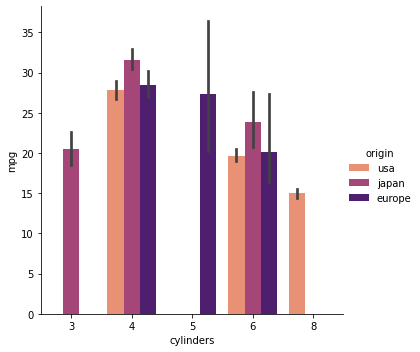

In [15]:
sns.catplot(x='cylinders',y='mpg', hue="origin", kind="bar", data=df,palette='magma_r')

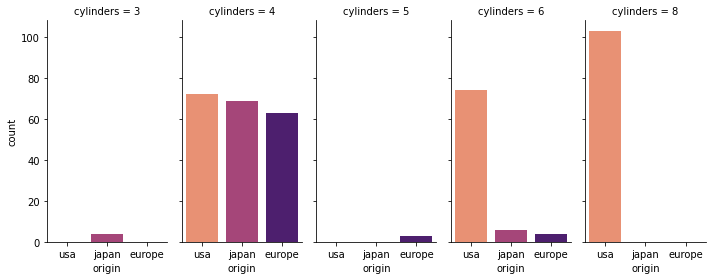

In [16]:
g = sns.FacetGrid(df, col="cylinders", height=4, aspect=.5,hue='origin',palette='magma_r')
g.map(sns.countplot, "origin", order = df['origin'].value_counts().index)

#Histogram

In [17]:
alt.Chart(df).mark_bar().encode(
    alt.X("model_year:Q", bin=True),
    y='count()',
).configure_mark(
    opacity=0.7,
    color='cyan'
)

alt.Chart(...)

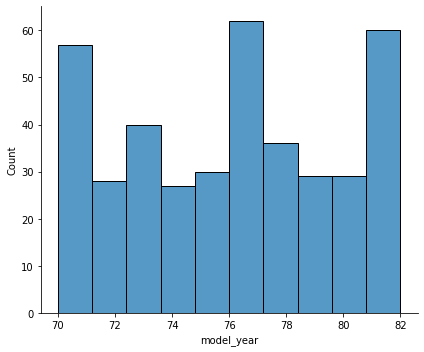

In [18]:
sns.displot(df, x='model_year', aspect=1.2)

#Strip plots

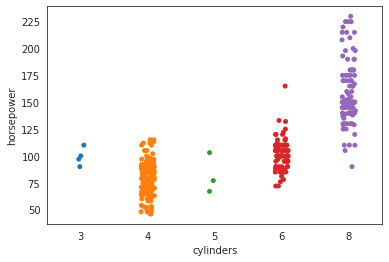

In [19]:
sns.set_style("white")
ax = sns.stripplot(y="horsepower", x="cylinders", data=df)

In [20]:
alt.Chart(df).mark_tick(filled=True).encode(
    x='horsepower:Q',
    y='cylinders:O',
    color='origin'
)

alt.Chart(...)

#Interactive plots

In [21]:
select = alt.selection(type='interval')
values = alt.Chart(df).mark_point().encode(
    x='horsepower:Q',
    y='mpg:Q',
    color=alt.condition(select, 'origin:N', alt.value('lightgray'))
).add_selection(
    select
)

bars = alt.Chart(df).mark_bar().encode(
    y='origin:N',
    color='origin:N',
    x='count(origin):Q'
).transform_filter(
    select
)
values & bars

alt.VConcatChart(...)

#Bubble plots

In [22]:
alt.Chart(df).mark_point(filled=True).encode(
    x='horsepower',
    y='mpg',
    size='acceleration',
    color='origin'
)

alt.Chart(...)

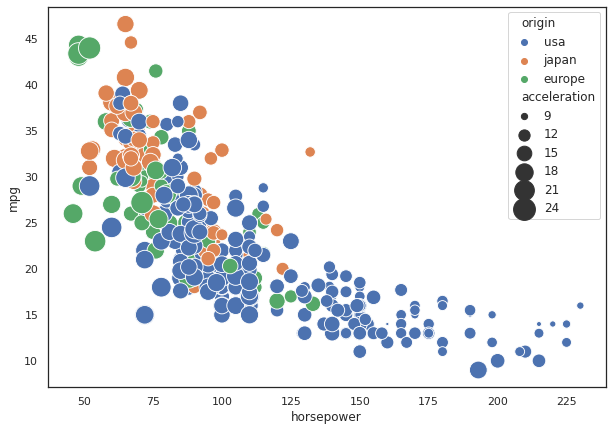

In [23]:
sns.set(rc={'figure.figsize':(10,7)})
sns.set_style("white")
sns.scatterplot(data=df, x="horsepower", y="mpg", size="acceleration", hue='origin',legend=True, sizes=(10, 500))

In [24]:
brush = alt.selection(type='interval')
points = alt.Chart(df).mark_point().encode(
    x='horsepower:Q',
    y='mpg:Q',
    color=alt.condition(brush, 'origin:N', alt.value('lightgray'))
).add_selection(
    brush
)

bars = alt.Chart(df).mark_bar().encode(
    y='origin:N',
    color='origin:N',
    x='count(origin):Q'
).transform_filter(
    brush
)

points & bars

alt.VConcatChart(...)